Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [ ]:
df=pd.read_csv('/content/amazon.csv',encoding='ISO-8859-1',parse_dates=['date'])
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [ ]:
df.shape

(6454, 5)

In [ ]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [ ]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [ ]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [ ]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

Handling duplicates values

In [ ]:
df.duplicated().any()

True

In [ ]:
duplicate_count=df.duplicated().sum()
print(duplicate_count)

32


In [ ]:
dupli=df.duplicated()
d=df[dupli]
print(d)

      year        state      month  number       date
259   2017      Alagoas    Janeiro    38.0 2017-01-01
2630  1998  Mato Grosso    Janeiro     0.0 1998-01-01
2650  1998  Mato Grosso  Fevereiro     0.0 1998-01-01
2670  1998  Mato Grosso      Março     0.0 1998-01-01
2690  1998  Mato Grosso      Abril     0.0 1998-01-01
2710  1998  Mato Grosso       Maio     0.0 1998-01-01
3586  1998      Paraiba    Janeiro     0.0 1998-01-01
3606  1998      Paraiba  Fevereiro     0.0 1998-01-01
3621  2013      Paraiba  Fevereiro     9.0 2013-01-01
3626  1998      Paraiba      Março     0.0 1998-01-01
3646  1998      Paraiba      Abril     0.0 1998-01-01
3666  1998      Paraiba       Maio     0.0 1998-01-01
4542  1998          Rio    Janeiro     0.0 1998-01-01
4562  1998          Rio  Fevereiro     0.0 1998-01-01
4582  1998          Rio      Março     0.0 1998-01-01
4585  2001          Rio      Março     0.0 2001-01-01
4590  2006          Rio      Março     8.0 2006-01-01
4602  1998          Rio     

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape
#before reemoving the duplicates (6454, 5) was the shape of the dataset
#here we can understand that 32 duplicates values are removed.

(6422, 5)

Renaming Month names from Portuguese to English

In [ ]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [ ]:
df['month_new']=df['month'].map({'Janeiro':'january','Fevereiro':'february','Março':'march','Abril':'april','Maio':'may',
                                 'Junho':'june','Julho':'july','Agosto':'august','Setembro':'september',
                                 'Outubro':'october','Novembro':'november','Dezembro':'december'})
df.head()

<ipython-input-154-956a9a55f26f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_new']=df['month'].map({'Janeiro':'january','Fevereiro':'february','Março':'march','Abril':'april','Maio':'may',


,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,january
1,1999,Acre,Janeiro,0.0,1999-01-01,january
2,2000,Acre,Janeiro,0.0,2000-01-01,january
3,2001,Acre,Janeiro,0.0,2001-01-01,january
4,2002,Acre,Janeiro,0.0,2002-01-01,january


In [ ]:
df=df.drop(['month'],axis=1)
df.head(2)

,year,state,number,date,month_new
0,1998,Acre,0.0,1998-01-01,january
1,1999,Acre,0.0,1999-01-01,january


Visualization

In [ ]:
df.month_new.value_counts()

august       540
september    540
october      540
november     540
june         539
july         539
january      535
february     535
march        534
april        534
may          533
december     513
Name: month_new, dtype: int64

<Axes: xlabel='month_new', ylabel='count'>

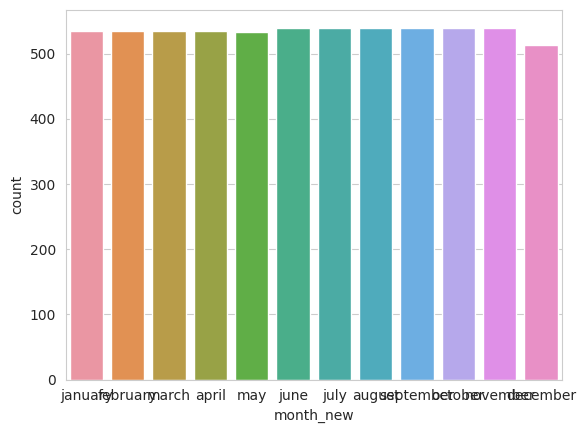

In [ ]:
sns.countplot(x='month_new',data=df)

In [ ]:
df.state.value_counts()

Rio                 697
Mato Grosso         473
Paraiba             472
Acre                239
Pará                239
Sergipe             239
Sao Paulo           239
Santa Catarina      239
Roraima             239
Rondonia            239
Piau                239
Pernambuco          239
Minas Gerais        239
Alagoas             239
Maranhao            239
Goias               239
Espirito Santo      239
Distrito Federal    239
Ceara               239
Bahia               239
Amazonas            239
Amapa               239
Tocantins           239
Name: state, dtype: int64

<Axes: xlabel='count', ylabel='state'>

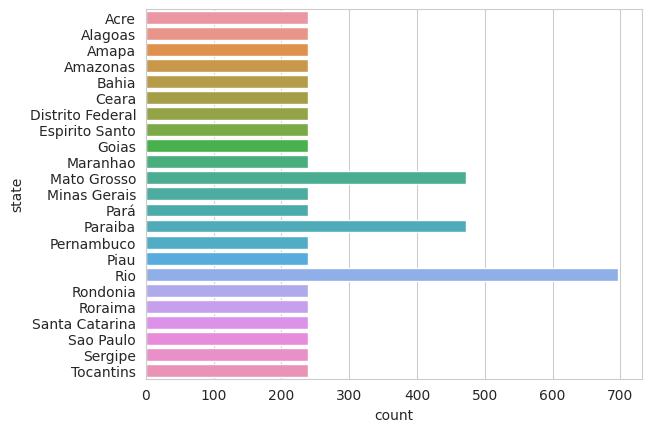

In [ ]:
sns.countplot(y='state',data=df)

Displaying maximum number of forest fire recorded in each month

In [ ]:
fire=df.groupby('month_new')['number'].sum().reset_index()
fire

,month_new,number
0,april,28184.770
1,august,88050.435
2,december,57535.480
3,february,30839.050
4,january,47681.844
5,july,92319.113
6,june,55997.675
7,march,30709.405
8,may,34725.363
9,november,85508.054


<Axes: xlabel='month_new', ylabel='number'>

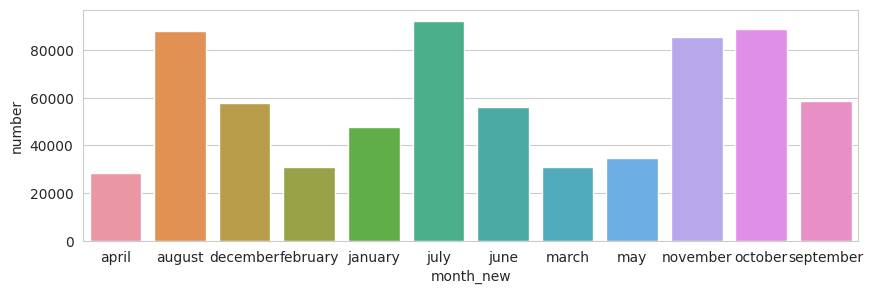

In [ ]:
plt.figure(figsize=(10,3))
sns.barplot(x='month_new',y='number',data=fire)

Displaying maximum number of forest fires recorded in given year

In [ ]:
year=df.groupby('year')['number'].sum().reset_index()
year

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

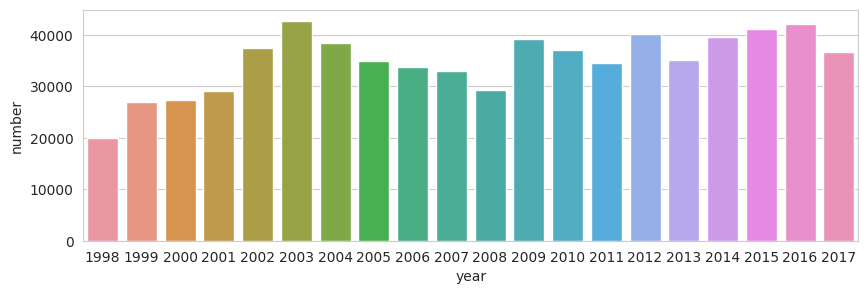

In [ ]:
plt.figure(figsize=(10,3))
sns.barplot(x='year',y='number',data=year)

Displaying maximum number of forest fires in each state

In [ ]:
state1=df.groupby('state')['number'].sum().reset_index()
state1

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<Axes: xlabel='state', ylabel='number'>

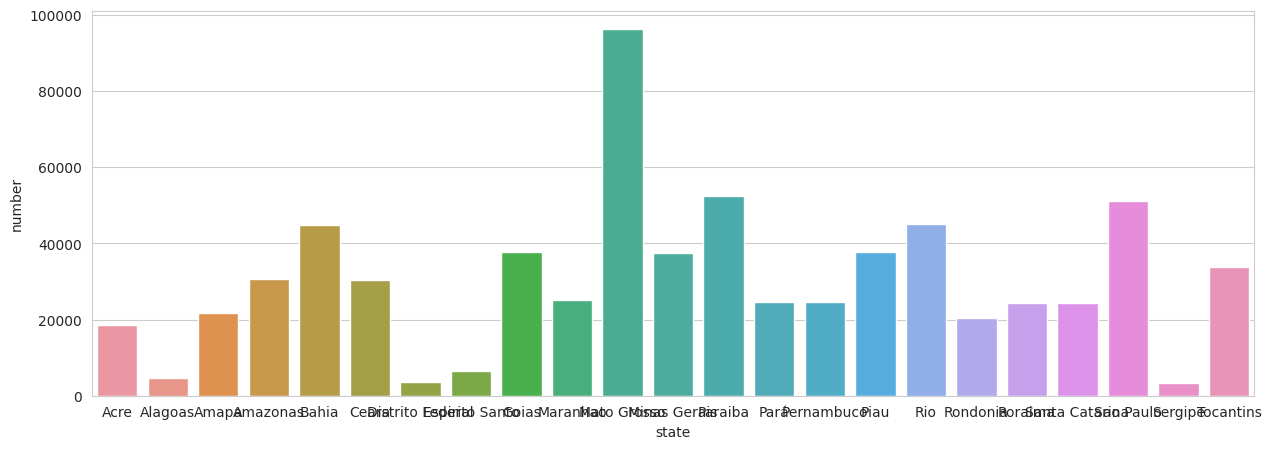

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='state',y='number',data=state1)

Total number of forest fires reported  in amazonas

In [ ]:
df2=df[df['state']=='Amazonas']
df3=df2.groupby('year')['number'].sum().reset_index()
df3

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

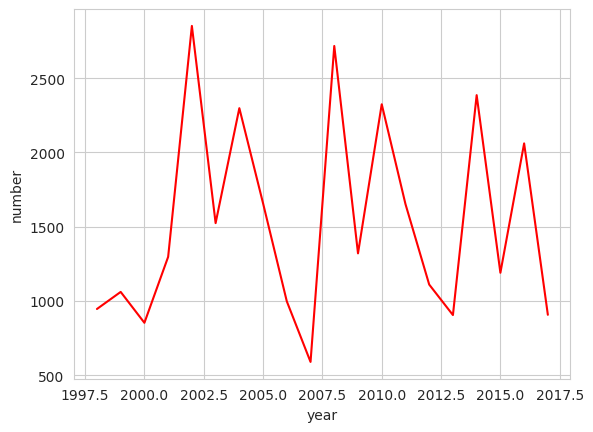

In [ ]:

sns.lineplot(x='year',y='number',data=df3,color='r')

Total number of forest fires reported  in sergipe

In [ ]:
df4=df[df['state']=='Sergipe']
df5=df4.groupby('year')['number'].sum().reset_index()
df5

,year,number
0,1998,20.0
1,1999,93.0
2,2000,17.0
3,2001,24.0
4,2002,208.0
5,2003,403.0
6,2004,190.0
7,2005,200.0
8,2006,147.0
9,2007,124.0


<Axes: xlabel='year', ylabel='number'>

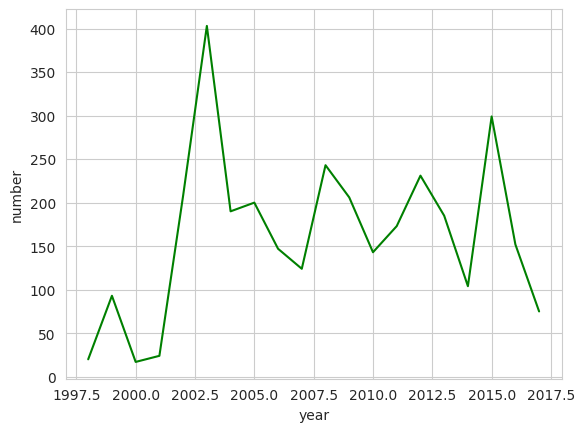

In [ ]:

sns.lineplot(x='year',y='number',data=df5,color='g')

Display total number of fires reported in the year 2017 based on month

In [ ]:
year_2017=df[df['year']==2017]
fire_count=year_2017.groupby('month_new')['number'].sum().reset_index()
fire_count

,month_new,number
0,april,1559.000
1,august,4120.410
2,february,1400.000
3,january,2342.000
4,july,5929.998
5,june,4148.361
6,march,2017.000
7,may,2506.000
8,november,6217.379
9,october,3600.159


<Axes: xlabel='month_new', ylabel='number'>

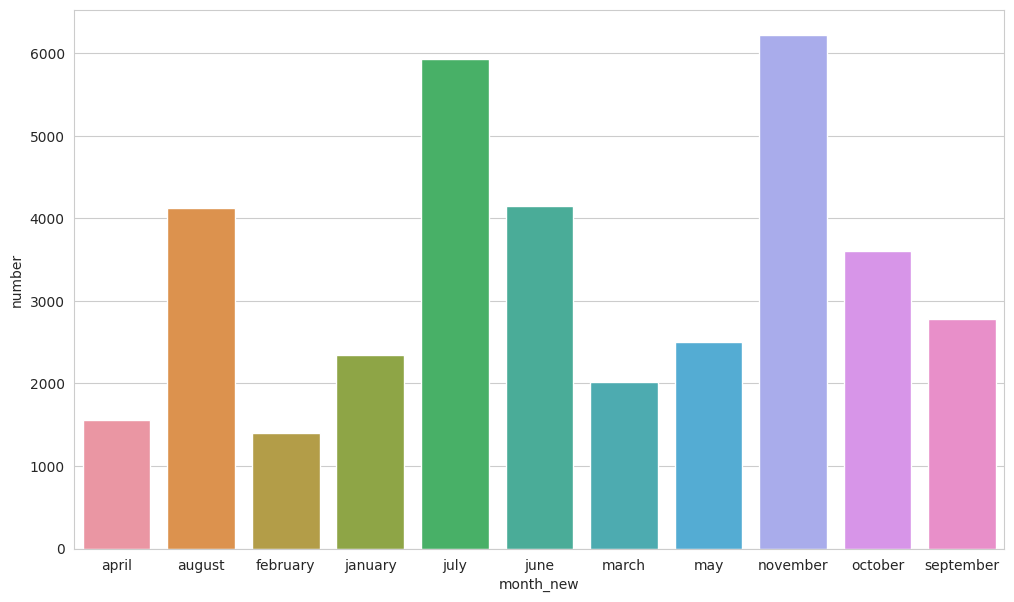

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='month_new',y='number',data=fire_count)

Average number of fires reported from highest to lowest by state wise

In [ ]:
df6=df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
df6

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


<Axes: xlabel='state', ylabel='number'>

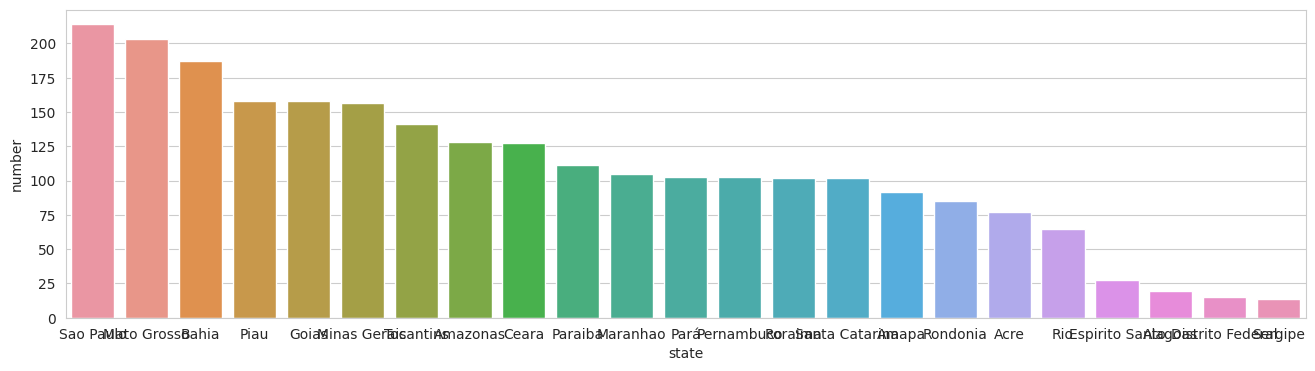

In [ ]:
plt.figure(figsize=(16,4))
sns.barplot(x='state',y='number',data=df6)